1. Масштабирование: а. Нормализовать признак - median_income б. Привести признак - population к масштабу от 0 до 100


2. Заполнение пропусков: а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории


3. Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [1]:
HOUSING_PATH = "data/housing.csv"

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(HOUSING_PATH)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data[['median_income']]

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
5,4.0368
6,3.6591
7,3.1200
8,2.0804
9,3.6912


In [6]:
# 1 а.Нормирование признака median_income
from sklearn import preprocessing
Min_max_scaler = preprocessing.MinMaxScaler()
data['norm_median_income'] = Min_max_scaler.fit_transform(data[['median_income']])

In [7]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B6172F2080>,
      dtype=object)

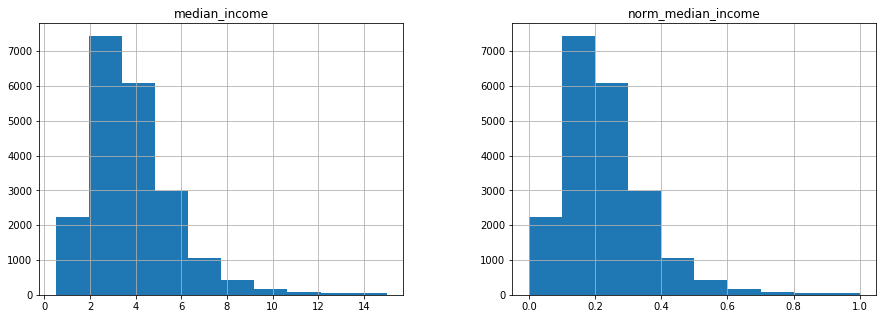

In [8]:
data[['median_income', 'norm_median_income']].hist(figsize =(15,5))

In [9]:
# 1 б.Привести признак - population к масштабу от 0 до 100
Min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
data['new_population'] = Min_max_scaler.fit_transform(data[['population']])

In [10]:
data[['new_population', 'population']].describe()

,new_population,population
count,20640.000000,20640.000000
mean,3.986874,1425.476744
std,3.174030,1132.462122
min,0.000000,3.000000
25%,2.197371,787.000000
50%,3.259621,1166.000000
75%,4.826368,1725.000000
max,100.000000,35682.000000


In [11]:
# 2 а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity 
#      Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением 
#      по этой категории

data['total_bedrooms']= data.groupby("ocean_proximity")[['total_bedrooms']].transform(lambda x: x.fillna(x.mean()))

In [12]:
data['total_bedrooms'].isnull().sum()

0

Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [13]:
# 3 а.Посчитать среднее кол-во комнат в строке (total_rooms/households)
data['avg_rooms_per_house'] = round(data['total_rooms']/data['households'])

In [25]:
data.groupby('avg_rooms_per_house').count().head(-1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,norm_median_income,new_population
avg_rooms_per_house,,,,,,,,,,,,
1.0,9,9,9,9,9,9,9,9,9,9,9,9
2.0,159,159,159,159,159,159,159,159,159,159,159,159
3.0,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
4.0,4333,4333,4333,4333,4333,4333,4333,4333,4333,4333,4333,4333
5.0,6728,6728,6728,6728,6728,6728,6728,6728,6728,6728,6728,6728
6.0,5166,5166,5166,5166,5166,5166,5166,5166,5166,5166,5166,5166
7.0,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
8.0,731,731,731,731,731,731,731,731,731,731,731,731
9.0,194,194,194,194,194,194,194,194,194,194,194,194


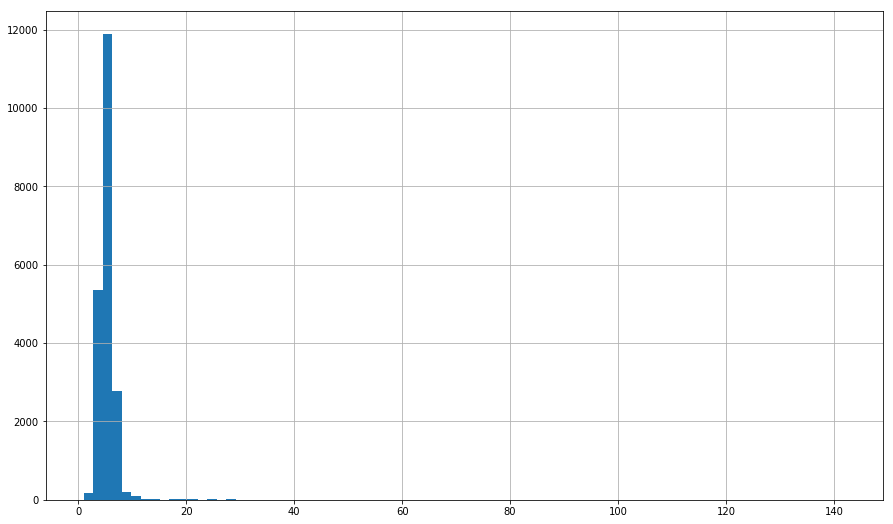

In [21]:
# 3 б. Разбить полученный столбец на группы на ваше усмотрение
data['avg_rooms_per_house'].hist(figsize=(15,9), bins = 80)

In [27]:
data['avg_room_bin'] = pd.cut(data['avg_rooms_per_house'], bins=[0,3,4,5,6,7,8,9,133]\
                              , labels=['До 3х комнат','4 комнаты','5 комнат','6 комнат', '7 комнат','8 комнат','9 комнат','больше 9 комнат'])